Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

def linan(ab1, ab2):
    a11, a12, b1 = map(float, ab1.split())
    a21, a22, b2 = map(float, ab2.split())

    A = np.array([[a11, a12], [a21, a22]])
    B = np.array([b1, b2])

    x, y = np.linalg.solve(A, B)
    return x,y

ab1 = "8.0 2.0 5.0"
ab2 = "3.0 4.0 2.0"
print(linan(ab1, ab2))


(0.6153846153846154, 0.038461538461538464)


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np

def matrix(n):
    if n <= 1:
        print("error")

    matrix = np.ones((n, n))
    matrix[1:n-1,1:n-1]=0

    return matrix

n = 5
print(matrix(n))

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


Обратите внимание, что ожидается массив numpy

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy.optimize import minimize

def f(x, a, b):
    return (x + a)**2 - b

def g(x, a, b):
    return abs(f(x, a, b))

a = 3
b = 4

min_f = minimize(f, 0, args=(a, b))

min_g1 = minimize(g, -a + math.sqrt(b), args=(a, b))
min_g2 = minimize(g, -a - math.sqrt(b), args=(a, b))

print(min_f.x, min_g1.x,min_g2.x)


[-2.99999998] [-1.] [-5.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

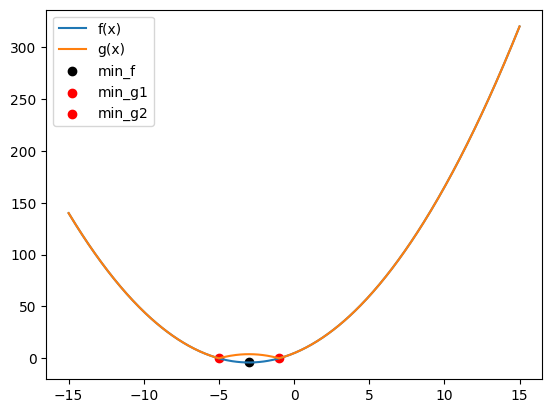

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-15, 15, 500)

plt.plot(x, f(x, a, b), label='f(x)')
plt.plot(x, g(x, a, b), label='g(x)')

plt.scatter(min_f.x, f(min_f.x, a, b), color='black', label='min_f')
plt.scatter(min_g1.x, f(min_g1.x, a, b), color='red', label='min_g1')
plt.scatter(min_g2.x, f(min_g2.x, a, b), color='red', label='min_g2')

plt.legend()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
def chance():
    p = 1 / (2 ** 10)*2
    q = 1 - p
    not_success = q ** 1000
    success = 1 - not_success
    return success

print(chance())


0.858440454732242


In [ ]:
def chance():
    p = 1 / (2 ** 8)*2
    q = 1 - p
    not_success = q ** 1000
    success = 1 - not_success
    return success

print(chance())


0.9996075798421896


In [ ]:
import math

n=1000
k=3
p1_chance = (0.5)**10*2
p3_chance = math.factorial(n) // (math.factorial(k) * math.factorial(n - k)) * (p1_chance**k) * ((1 - p1_chance)**(1000 - k))

print(p3_chance)


0.1762873858121736
